In [11]:
from sklearn import svm
from sklearn import preprocessing as pre
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn import model_selection
import numpy as np
import pandas as pd
from sklearn.neural_network import MLPClassifier
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier


def code(testX):

    trainFileName="features.csv"
    trainData = np.genfromtxt( fname =trainFileName, delimiter= ',') # read training data from file
    trainX=trainData[1:,2:12] # create tranining data matix
    #trainX=trainData[1:,2:39] # create tranining data matix

    trainLabel = np.genfromtxt( fname ="TrainingLabels.csv", delimiter= ',', dtype='U11') # read training data from file
    trainY=trainLabel[1:] # create labels array
    print(trainY.size)

    C=10
    gamma = 0.01
    #clf = svm.SVC(C=C, gamma=gamma, kernel = 'linear')
    clf = RandomForestClassifier(n_estimators=10, max_depth=2, random_state=0) #RandomForests

    #clf=tree.DecisionTreeClassifier()
    #clf = KNeighborsClassifier(n_neighbors=3)
    #clf=MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(15,), random_state=1)

    clf.fit(trainX, trainY)



    testData = np.genfromtxt( fname =testX, delimiter= ',') # read testing data from file
    testX=testData[1:,2:12] # create testing data matix

    testLabels=np.genfromtxt( fname= "TestingLabels.csv", delimiter = ',', dtype ='U11') # read testing data from file
    code.testY=testLabels[1:] # create labels array
    print("\t\t====== Actual Testing Set Labels =======\n")
    print("------------------------------------------------------------------------------------------------------")
    print(code.testY)
    print("------------------------------------------------------------------------------------------------------")
    
    trainPredy = clf.predict(trainX)
    code.testPredy=clf.predict(testX)
    print("\t\t\t====== Predicted Labels =======\n")
    print("------------------------------------------------------------------------------------------------------")
    print(code.testPredy)
    print("------------------------------------------------------------------------------------------------------")
    
    
    #return testPredy


    prediction = pd.DataFrame(code.testPredy,columns=['Label'])
    prediction.to_csv('prediction.csv',index_label='ID')
    
    ''' TrainAccuracy = accuracy_score(trainY, trainPredy)
    print("\n------------------------------------------------------------------------------------------------------")
    print("SVM Training Testing accuracy = {}% ".format(TrainAccuracy * 100))
    
    classificationError = 1 - TrainAccuracy
    print("\n------------------------------------------------------------------------------------------------------")
    print("SVM Testing Classification Error = {}% ".format(classificationError * 100))'''

    
    TestAccuracy = accuracy_score(code.testY, code.testPredy)
    print("\n------------------------------------------------------------------------------------------------------")
    print("Accuracy = {}% ".format(TestAccuracy * 100))
    
    '''classificationError = 1 - accuracy
    print("\n------------------------------------------------------------------------------------------------------")
    print("SVM Testing Classification Error = {}% ".format(classificationError * 100))'''

   # return code.testY, code.testPredy

code("TestingFeatures.csv")

201
		====== Actual Testing Set Labels =======

------------------------------------------------------------------------------------------------------
['Anger' 'Anger' 'Anger' 'Anger' 'Anger' 'Anger' 'Anger' 'Anger' 'Anger'
 'Anger' 'Anger' 'Anger' 'Anger' 'Anger' 'Anger' 'Anger' 'Anger' 'Anger'
 'Anger' 'Anger' 'Happy' 'Happy' 'Happy' 'Happy' 'Happy' 'Happy' 'Happy'
 'Happy' 'Happy' 'Happy' 'Happy' 'Happy' 'Happy' 'Happy' 'Happy' 'Sad'
 'Sad' 'Sad' 'Sad' 'Sad' 'Sad' 'Sad' 'Sad' 'Sad' 'Sad' 'Sad' 'Sad' 'Sad'
 'Sad' 'Sad']
------------------------------------------------------------------------------------------------------
			====== Predicted Labels =======

------------------------------------------------------------------------------------------------------
['Anger' 'Anger' 'Anger' 'Anger' 'Anger' 'Anger' 'Anger' 'Anger' 'Anger'
 'Anger' 'Anger' 'Anger' 'Anger' 'Anger' 'Anger' 'Anger' 'Anger' 'Anger'
 'Anger' 'Anger' 'Anger' 'Happy' 'Anger' 'Happy' 'Anger' 'Anger' 'Anger'
 'Anger' 'A

In [12]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(code.testY,code.testPredy))

             precision    recall  f1-score   support

      Anger       0.60      0.90      0.72        20
      Happy       0.80      0.53      0.64        15
        Sad       1.00      0.67      0.80        15

avg / total       0.78      0.72      0.72        50



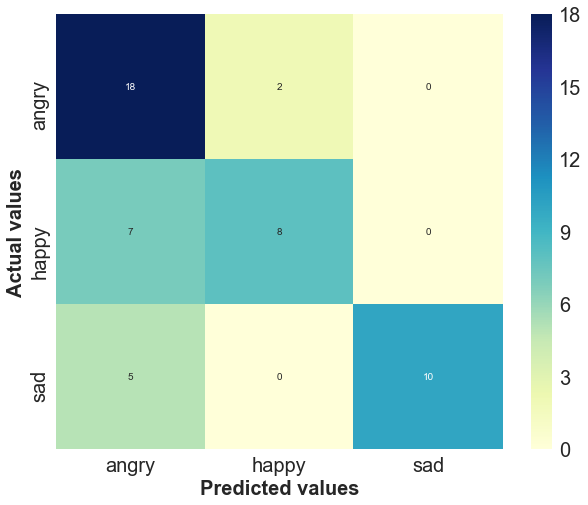

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


labels = ['angry', 'happy', 'sad']
cm1 = pd.DataFrame(confusion_matrix(code.testY, code.testPredy), index = labels, columns = labels)
plt.figure(figsize = (10, 8))
sns.heatmap(cm1, annot = True, cbar = True, fmt = 'd', linecolor='white', cmap ="YlGnBu" )
plt.ylabel('Actual values', fontsize=20, fontweight='bold')
sns.set(font_scale=2.0)
plt.xlabel('Predicted values', fontsize=20, fontweight='bold')
plt.show()

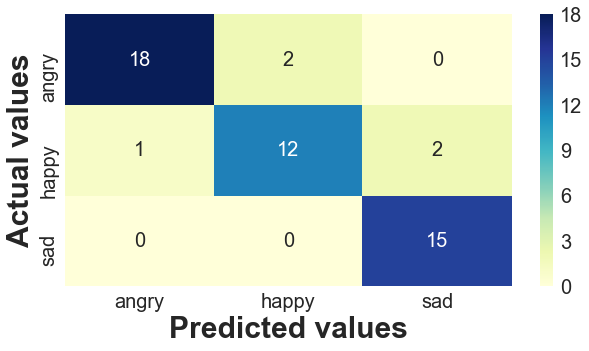

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

%matplotlib inline


labels = ['angry', 'happy', 'sad']
cm1 = pd.DataFrame(confusion_matrix(code.testY, code.testPredy), index = labels, columns = labels)
plt.figure(figsize = (10, 5))
sns.heatmap(cm1, annot = True, cbar = True, fmt = 'd', linecolor='white', cmap ="YlGnBu", annot_kws={"size": 20})
plt.ylabel('Actual values', fontsize=30, fontweight='bold')
sns.set(font_scale=2.0)
plt.xlabel('Predicted values', fontsize=30, fontweight='bold')
plt.show()

In [4]:
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['legend.numpoints'] = 1

#generate some random data
pred = code.testY
GT =  code.testPredy
fig, ax = plt.subplots(figsize=(6,4))

# plot a black line between the 
# ith prediction and the ith ground truth 
for i in range(len(pred)):
    ax.plot([i,i],[pred[i], GT[i]], c="k", linewidth=0.5)
ax.plot(pred,'o', label='Prediction', color = 'g')
ax.plot(GT,'^', label='Ground Truth', color = 'r' )

ax.set_xlim((-1,10))
plt.xlabel('a')
plt.ylabel('b')
plt.title('test')

plt.legend()             
plt.show()

ValueError: could not convert string to float: 'Anger'

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# example data
x = code.testY
y1 = pd.Series(np.exp(-x), index = x)
y2 = pd.Series(np.exp(-x)+ np.sin(x), index = x)
avg_line = (y1 + y2)*0.5

err = (avg_line - y1).abs()

fig, ax = plt.subplots(1)
y1.plot(marker = 'o', label='Prediction', color = 'g', linestyle  = '', ax = ax)
y2.plot(marker = '^', label='Ground Truth', color = 'r', linestyle  = '', ax = ax)
ax.errorbar(x, avg_line.values, yerr=err.values, fmt= 'none', ecolor = 'k', barsabove = False, capthick=0)
plt.style.use('ggplot')
ax.legend()